In [ ]:
!pip install pybaseball

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 420.0/420.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.5/312.5 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 24.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pybaseball as pb 

In [ ]:
# load season record
season_record = pb.standings(2001)
season_record

[                     Tm   W    L  W-L%    GB
 1      New York Yankees  95   65  .594    --
 2        Boston Red Sox  82   79  .509  13.5
 3     Toronto Blue Jays  80   82  .494  16.0
 4     Baltimore Orioles  63   98  .391  32.5
 5  Tampa Bay Devil Rays  62  100  .383  34.0,
                    Tm   W   L  W-L%    GB
 1   Cleveland Indians  91  71  .562    --
 2     Minnesota Twins  85  77  .525   6.0
 3   Chicago White Sox  83  79  .512   8.0
 4      Detroit Tigers  66  96  .407  25.0
 5  Kansas City Royals  65  97  .401  26.0,
                   Tm    W   L  W-L%    GB
 1   Seattle Mariners  116  46  .716    --
 2  Oakland Athletics  102  60  .630  14.0
 3     Anaheim Angels   75  87  .463  41.0
 4      Texas Rangers   73  89  .451  43.0,
                       Tm   W   L  W-L%    GB
 1         Atlanta Braves  88  74  .543    --
 2  Philadelphia Phillies  86  76  .531   2.0
 3          New York Mets  82  80  .506   6.0
 4        Florida Marlins  76  86  .469  12.0
 5         Montrea

In [ ]:
type(season_record)

list

In [ ]:
sr_df = pd.DataFrame(season_record, columns=["Tm", "W", "L", "W-L%", "GB"])
sr_df = np.array
sr_df

/usr/local/lib/python3.9/dist-packages/pandas/core/internals/construction.py:568: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


ValueError: ignored

In [ ]:
# convert list to array
sr_array = np.array(season_record)
sr_array.shape

(6, 5, 5)

In [ ]:
# re-shape to be used as a 2-D input for pd
sr = np.array(season_record).reshape(6, 5, 5)
sr = sr.reshape(30, -1)
# convert array to dataframe
sr_df = pd.DataFrame(sr, columns=["Tm", "W", "L", "W-L%", "GB"])
sr_df

<ipython-input-50-963eef260136>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sr = np.array(season_record).reshape(6, 5, 5)


ValueError: ignored

In [ ]:
# create a dictionary of team names and abbreviations
teams = {
    'Arizona Diamondbacks': 'ARI',
    'Atlanta Braves': 'ATL',
    'Baltimore Orioles': 'BAL',
    'Boston Red Sox': 'BOS',
    'Chicago Cubs': 'CHC',
    'Chicago White Sox': 'CHW',
    'Cincinnati Reds': 'CIN',
    'Cleveland Indians': 'CLE',
    'Colorado Rockies': 'COL',
    'Detroit Tigers': 'DET',
    'Houston Astros': 'HOU',
    'Kansas City Royals': 'KCR',
    'Los Angeles Angels': 'LAA',
    'Los Angeles Dodgers': 'LAD',
    'Miami Marlins': 'MIA',
    'Milwaukee Brewers': 'MIL',
    'Minnesota Twins': 'MIN',
    'New York Mets': 'NYM',
    'New York Yankees': 'NYY',
    'Oakland Athletics': 'OAK',
    'Philadelphia Phillies': 'PHI',
    'Pittsburgh Pirates': 'PIT',
    'San Diego Padres': 'SDP',
    'Seattle Mariners': 'SEA',
    'San Francisco Giants': 'SFG',
    'St. Louis Cardinals': 'STL',
    'Tampa Bay Rays': 'TBR',
    'Texas Rangers': 'TEX',
    'Toronto Blue Jays': 'TOR',
    'Washington Nationals': 'WSN'
}

# replace team names with abbreviations to match rest of dataset
sr_df[0] = sr_df[0].replace(teams)

sr_df

,0,1,2,3,4
0,TBR,100,62,.617,--
1,BOS,92,70,.568,8.0
2,NYY,92,70,.568,8.0
3,TOR,91,71,.562,9.0
4,BAL,52,110,.321,48.0
5,CHW,93,69,.574,--
6,CLE,80,82,.494,13.0
7,DET,77,85,.475,16.0
8,KCR,74,88,.457,19.0
9,MIN,73,89,.451,20.0


In [ ]:
# sort by team abbrv
sr_df_sorted = sr_df.sort_values(0)
sr_df_sorted

,0,1,2,3,4
29,ARI,52,110,.321,55.0
15,ATL,88,73,.547,--
4,BAL,52,110,.321,48.0
1,BOS,92,70,.568,8.0
23,CHC,71,91,.438,24.0
5,CHW,93,69,.574,--
22,CIN,83,79,.512,12.0
6,CLE,80,82,.494,13.0
28,COL,74,87,.460,32.5
7,DET,77,85,.475,16.0


In [ ]:
# load team batting stats for 2021
pd.set_option('display.max_columns', None)
season_batting = pb.team_batting(2021)
season_batting

,teamIDfg,Season,Team,Age,G,AB,PA,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,GB,FB,LD,IFFB,Pitches,Balls,Strikes,IFH,BU,BUH,BB%,K%,BB/K,OBP,SLG,OPS,ISO,BABIP,GB/FB,LD%,GB%,FB%,IFFB%,HR/FB,IFH%,BUH%,wOBA,wRAA,wRC,Bat,Fld,Rep,Pos,RAR,WAR,Dol,Spd,wRC+,WPA,-WPA,+WPA,RE24,REW,pLI,phLI,PH,WPA/LI,Clutch,FB% (Pitch),FBv,SL%,SLv,CT%,CTv,CB%,CBv,CH%,CHv,SF%,SFv,KN%,KNv,XX%,PO%,wFB,wSL,wCT,wCB,wCH,wSF,wKN,wFB/C,wSL/C,wCT/C,wCB/C,wCH/C,wSF/C,wKN/C,O-Swing%,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,BsR,FA% (sc),FT% (sc),FC% (sc),FS% (sc),FO% (sc),SI% (sc),SL% (sc),CU% (sc),KC% (sc),EP% (sc),CH% (sc),SC% (sc),KN% (sc),UN% (sc),vFA (sc),vFT (sc),vFC (sc),vFS (sc),vFO (sc),vSI (sc),vSL (sc),vCU (sc),vKC (sc),vEP (sc),vCH (sc),vSC (sc),vKN (sc),FA-X (sc),FT-X (sc),FC-X (sc),FS-X (sc),FO-X (sc),SI-X (sc),SL-X (sc),CU-X (sc),KC-X (sc),EP-X (sc),CH-X (sc),SC-X (sc),KN-X (sc),FA-Z (sc),FT-Z (sc),FC-Z (sc),FS-Z (sc),FO-Z (sc),SI-Z (sc),SL-Z (sc),CU-Z (sc),KC-Z (sc),EP-Z (sc),CH-Z (sc),SC-Z (sc),KN-Z (sc),wFA (sc),wFT (sc),wFC (sc),wFS (sc),wFO (sc),wSI (sc),wSL (sc),wCU (sc),wKC (sc),wEP (sc),wCH (sc),wSC (sc),wKN (sc),wFA/C (sc),wFT/C (sc),wFC/C (sc),wFS/C (sc),wFO/C (sc),wSI/C (sc),wSL/C (sc),wCU/C (sc),wKC/C (sc),wEP/C (sc),wCH/C (sc),wSC/C (sc),wKN/C (sc),O-Swing% (sc),Z-Swing% (sc),Swing% (sc),O-Contact% (sc),Z-Contact% (sc),Contact% (sc),Zone% (sc),Pace,Def,wSB,UBR,Age Rng,Off,Lg,wGDP,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,TTO%,CH% (pi),CS% (pi),CU% (pi),FA% (pi),FC% (pi),FS% (pi),KN% (pi),SB% (pi),SI% (pi),SL% (pi),XX% (pi),vCH (pi),vCS (pi),vCU (pi),vFA (pi),vFC (pi),vFS (pi),vKN (pi),vSB (pi),vSI (pi),vSL (pi),vXX (pi),CH-X (pi),CS-X (pi),CU-X (pi),FA-X (pi),FC-X (pi),FS-X (pi),KN-X (pi),SB-X (pi),SI-X (pi),SL-X (pi),XX-X (pi),CH-Z (pi),CS-Z (pi),CU-Z (pi),FA-Z (pi),FC-Z (pi),FS-Z (pi),KN-Z (pi),SB-Z (pi),SI-Z (pi),SL-Z (pi),XX-Z (pi),wCH (pi),wCS (pi),wCU (pi),wFA (pi),wFC (pi),wFS (pi),wKN (pi),wSB (pi),wSI (pi),wSL (pi),wXX (pi),wCH/C (pi),wCS/C (pi),wCU/C (pi),wFA/C (pi),wFC/C (pi),wFS/C (pi),wKN/C (pi),wSB/C (pi),wSI/C (pi),wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi),FRM,AVG+,BB%+,K%+,OBP+,SLG+,ISO+,BABIP+,LD+%,GB%+,FB%+,HR/FB%+,Pull%+,Cent%+,Oppo%+,Soft%+,Med%+,Hard%+,EV,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xBA,xSLG,xwOBA,L-WAR
0,14,2021,TOR,28,2383,5476,6070,1455,895,285,13,262,846,816,496,14,1218,51,35,10,112,81,20,0.266,1730,1662,889,171,23254,8419,14835,128,22,7,0.082,0.201,0.41,0.330,0.466,0.797,0.200,0.296,1.04,0.208,0.404,0.388,0.103,0.158,0.074,0.318,0.340,129.4,864,92.2,11.3,189.7,-15.6,297.3,29.8,$238.5,4.2,112,1.96,-100.71,102.67,96.67,9.07,0.91,1.26,100,7.46,-5.31,0.502,93.7,0.212,84.9,0.073,87.6,0.088,79.6,0.112,85.0,0.013,86.7,NaN,NaN,0.002,NaN,75.7,8.2,-1.6,34.4,9.1,3.5,NaN,0.65,0.17,-0.10,1.69,0.35,1.17,NaN,0.319,0.725,0.488,0.633,0.867,0.778,0.418,0.621,0.108,2.8,0.351,NaN,0.080,0.009,NaN,0.149,0.200,0.076,0.018,0.001,0.116,NaN,NaN,NaN,93.9,NaN,87.7,86.5,NaN,93.5,84.9,79.0,81.0,48.2,85.1,NaN,NaN,-1.9,NaN,0.4,-5.0,NaN,-4.8,1.6,2.3,3.0,3.1,-1.6,NaN,NaN,9.5,NaN,4.5,2.4,NaN,5.4,1.2,-4.3,-7.0,9.2,4.5,NaN,NaN,44.3,NaN,-5.1,1.2,NaN,16.4,1.4,34.7,1.2,0.7,6.1,NaN,NaN,0.54,NaN,-0.27,0.55,NaN,0.47,0.03,1.97,0.27,3.28,0.23,NaN,NaN,0.272,0.698,0.489,0.549,0.862,0.776,0.509,22.8,-4.3,2.9,0.6,22 - 37,95.1,16.9,-0.7,0.410,0.336,0.254,0.149,0.516,0.336,0.326,0.115,0.0,0.080,0.361,0.074,0.010,NaN,NaN,0.141,0.219,0.000,84.8,72.5,79.4,93.7,87.5,86.2,NaN,NaN,93.4,84.7,79.3,-1.5,6.8,2.3,-1.5,0.4,-5.1,NaN,NaN,-5.1,2.2,-3.3,3.0,-10.3,-7.7,8.3,3.4,0.8,NaN,NaN,3.8,-0.3,8.5,3.5,0.0,30.1,41.6,-2.9,2.6,NaN,NaN,19.6,6.4,0.0,0.13,-0.26,1.62,0.50,-0.17,1.11,NaN,NaN,0.60,0.13,4.97,0.276,0.691,0.489,0.551,0.862,0.776,0.512,22.8,5.0,108,96,88,104,112,118,102,1.01,95,105,116,102,97,102,91,100,104,90.3,13.6,418,0.097,117.4,1817,0.422,4305,0.149,0.257,NaN,NaN,NaN,30.5
1,21,2021,HOU,28,2319,5593,6291,1496,962,299,1

In [ ]:
type(season_batting)

pandas.core.frame.DataFrame

In [ ]:
# convert list to array
sb_array = np.array(season_batting)
sb_array

array([[14, 2021, 'TOR', ..., nan, nan, 30.5],
       [21, 2021, 'HOU', ..., nan, nan, 32.7],
       [3, 2021, 'BOS', ..., nan, nan, 22.6],
       ...,
       [27, 2021, 'PIT', ..., nan, nan, 8.5],
       [20, 2021, 'MIA', ..., nan, nan, 10.4],
       [13, 2021, 'TEX', ..., nan, nan, 11.6]], dtype=object)

In [ ]:
sb_df = pd.DataFrame(sb_array)
# sort by team abbrv to match dataset
sb_df_sorted = sb_df.sort_values(2)
sb_df_sorted

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318
25,15,2021,ARI,28,2449,5489,6144,1297,814,308,31,144,679,644,537,24,1465,54,28,32,99,43,16,0.236,1716,1463,839,155,24204,8669,15535,110,66,17,0.087,0.238,0.37,0.309,0.382,0.692,0.146,0.295,1.17,0.209,0.427,0.364,0.106,0.098,0.064,0.258,0.301,-73.0,671,-119.7,-19.1,192.0,34.9,108.6,10.9,$87.1,3.9,85,-11.72,-113.76,102.04,-69.11,-7.0,1.01,1.18,336,-8.91,-2.68,0.511,93.6,0.194,84.7,0.07,89.5,0.09,79.5,0.119,85.3,0.016,84.5,NaN,NaN,0.003,NaN,-24.0,-38.4,-10.3,-8.5,18.1,0.3,NaN,-0.19,-0.82,-0.61,-0.39,0.63,0.09,NaN,0.306,0.667,0.462,0.617,0.846,0.76,0.434,0.602,0.111,6.6,0.362,NaN,0.069,0.015,NaN,0.148,0.189,0.077,0.02,NaN,0.119,NaN,NaN,NaN,93.9,NaN,89.5,84.7,NaN,92.7,84.8,78.9,82.0,NaN,85.3,NaN,NaN,-2.2,NaN,1.0,-5.9,NaN,-2.2,1.5,2.3,3.6,NaN,-3.8,NaN,NaN,9.1,NaN,5.2,3.1,NaN,5.9,1.2,-4.8,-6.3,NaN,3.7,NaN,NaN,-26.5,NaN,-16.3,-3.6,NaN,-5.6,-45.7,-7.6,1.3,NaN,15.9,NaN,NaN,-0.3,NaN,-0.97,-0.98,NaN,-0.16,-1.0,-0.41,0.27,NaN,0.55,NaN,NaN,0.266,0.645,0.462,0.545,0.841,0.759,0.518,23.9,15.8,-2.8,6.7,21 - 37,-113.2,14.0,2.7,0.404,0.341,0.256,0.165,0.511,0.324,0.349,0.117,NaN,0.093,0.377,0.064,0.018,NaN,NaN,0.132,0.199,0.0,85.3,NaN,79.6,94.0,89.9,84.7,NaN,NaN,92.6,84.8,88.7,-3.5,NaN,2.7,-1.9,1.2,-5.6,NaN,NaN,-2.1,1.9,2.9,2.2,NaN,-7.0,8.1,4.4,1.7,NaN,NaN,3.8,-0.2,3.6,13.6,NaN,-9.8,-28.9,-16.6,-1.5,NaN,NaN,-5.3,-40.7,0.3,0.48,NaN,-0.44,-0.32,-1.07,-0.34,NaN,NaN,-0.16,-0.85,2.84,0.272,0.634,0.462,0.546,0.842,0.76,0.526,23.9,-2.7,95,95,107,95,91,85,100,1.0,100,100,72,100,97,104,101,101,99,87.7,12.9,230,0.056,116.0,1456,0.356,4088,0.176,0.287,NaN,NaN,NaN,11.6
8,16,2021,ATL,29,2392,5363,6056,1307,779,269,20,239,790,762,549,36,1453,67,43,32,81,59,19,0.244,1586,1520,830,133,23528,8515,15013,114,48,6,0.091,0.24,0.38,0.319,0.435,0.754,0.191,0.288,1.04,0.211,0.403,0.386,0.088,0.157,0.072,0.125,0.323,39.2,772,-11.7,5.9,189.3,36.7,239.4,24.0,$192.0,4.1,99,0.04,-106.15,106.19,63.17,6.39,0.98,1.23,272,2.22,-2.17,0.518,93.5,0.198,85.1,0.068,88.7,0.092,78.5,0.11,85.3,0.014,86.1,NaN,NaN,0.006,NaN,20.2,-11.9,0.4,13.5,29.5,-0.4,NaN,0.17,-0.26,0.03,0.63,1.14,-0.11,NaN,0.32,0.735,0.493,0.62,0.831,0.751,0.417,0.608,0.123,5.4,0.353,NaN,0.068,0.013,NaN,0.163,0.191,0.078,0.022,NaN,0.112,NaN,NaN,NaN,93.5,NaN,88.6,86.4,NaN,93.6,85.3,78.1,80.4,NaN,85.2,NaN,NaN,-2.2,NaN,0.5,-5.3,NaN,-4.6,1.7,2.8,3.2,NaN,-3.4,NaN,NaN,9.0,NaN,4.9,2.3,NaN,5.6,1.4,-4.6,-5.9,NaN,3.8,NaN,NaN,31.2,NaN,-7.0,-1.5,NaN,-18.9,-4.6,7.3,0.3,NaN,24.1,NaN,NaN,0.38,NaN,-0.44,-0.51,NaN,-0.49,-0.1,0.4,0.05,NaN,0.91,NaN,NaN,0.277,0.703,0.493,0.55,0.826,0.75,0.508,23.6,42.6,-0.8,0.9,22 - 38,-6.3,13.8,5.3,0.419,0.346,0.234,0.156,0.512,0.332,0.37,0.11,0.0,0.092,0.359,0.067,0.014,NaN,NaN,0.158,0.201,NaN,85.2,62.7,78.7,93.5,88.6,86.3,NaN,NaN,93.4,85.2,NaN,-3.3,0.3,2.6,-2.1,0.6,-4.9,NaN,NaN,-4.5,2.2,NaN,2.4,-8.2,-7.0,8.0,3.9,1.2,NaN,NaN,4.1,0.0,NaN,25.1,0.1,8.1,27.6,-0.

In [ ]:
# merge the two data frames on the 'key_col' column
merged_df = pd.merge(sr_df_sorted[[3]], sb_df_sorted[[11]], on=sr_df_sorted[0])
merged_df

,key_0,3,11
0,ARI,.321,144
1,ATL,.547,239
2,BAL,.321,195
3,BOS,.568,219
4,CHC,.438,210
5,CHW,.574,190
6,CIN,.512,222
7,CLE,.494,203
8,COL,.460,182
9,DET,.475,179


In [ ]:
x = merged_df[11].astype(float)
y = merged_df[3].astype(float)

In [ ]:
correlation = x.corr(y)
correlation

0.707020792975402

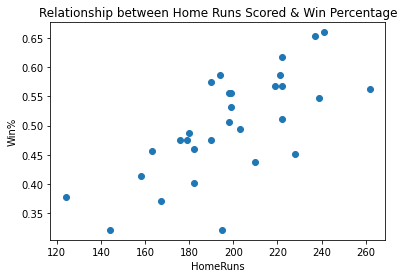

In [ ]:
plt.scatter(x, y)
plt.xlabel("HomeRuns")
plt.ylabel("Win%")
plt.title('Relationship between Home Runs Scored & Win Percentage')
plt.show()

In [ ]:
season_pitching = pb.team_pitching(2021)
season_pitching

,teamIDfg,Season,Team,Age,W,L,ERA,G,GS,CG,ShO,SV,BS,IP,TBF,H,R,ER,HR,BB,IBB,HBP,WP,BK,SO,GB,FB,LD,IFFB,Balls,Strikes,Pitches,RS,IFH,BU,BUH,K/9,BB/9,K/BB,H/9,HR/9,AVG,WHIP,BABIP,LOB%,FIP,GB/FB,LD%,GB%,FB%,IFFB%,HR/FB,IFH%,BUH%,Starting,Start-IP,Relieving,Relief-IP,RAR,WAR,Dollars,tERA,xFIP,WPA,-WPA,+WPA,RE24,REW,pLI,inLI,gmLI,exLI,Pulls,WPA/LI,Clutch,FB% 2,FBv,SL%,SLv,CT%,CTv,CB%,CBv,CH%,CHv,SF%,SFv,KN%,KNv,XX%,PO%,wFB,wSL,wCT,wCB,wCH,wSF,wKN,wFB/C,wSL/C,wCT/C,wCB/C,wCH/C,wSF/C,wKN/C,O-Swing%,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,HLD,SD,MD,ERA-,FIP-,xFIP-,K%,BB%,SIERA,RS/9,E-F,FA% (sc),FT% (sc),FC% (sc),FS% (sc),FO% (sc),SI% (sc),SL% (sc),CU% (sc),KC% (sc),EP% (sc),CH% (sc),SC% (sc),KN% (sc),UN% (sc),vFA (sc),vFT (sc),vFC (sc),vFS (sc),vFO (sc),vSI (sc),vSL (sc),vCU (sc),vKC (sc),vEP (sc),vCH (sc),vSC (sc),vKN (sc),FA-X (sc),FT-X (sc),FC-X (sc),FS-X (sc),FO-X (sc),SI-X (sc),SL-X (sc),CU-X (sc),KC-X (sc),EP-X (sc),CH-X (sc),SC-X (sc),KN-X (sc),FA-Z (sc),FT-Z (sc),FC-Z (sc),FS-Z (sc),FO-Z (sc),SI-Z (sc),SL-Z (sc),CU-Z (sc),KC-Z (sc),EP-Z (sc),CH-Z (sc),SC-Z (sc),KN-Z (sc),wFA (sc),wFT (sc),wFC (sc),wFS (sc),wFO (sc),wSI (sc),wSL (sc),wCU (sc),wKC (sc),wEP (sc),wCH (sc),wSC (sc),wKN (sc),wFA/C (sc),wFT/C (sc),wFC/C (sc),wFS/C (sc),wFO/C (sc),wSI/C (sc),wSL/C (sc),wCU/C (sc),wKC/C (sc),wEP/C (sc),wCH/C (sc),wSC/C (sc),wKN/C (sc),O-Swing% (sc),Z-Swing% (sc),Swing% (sc),O-Contact% (sc),Z-Contact% (sc),Contact% (sc),Zone% (sc),Pace,RA9-WAR,BIP-Wins,LOB-Wins,FDP-Wins,Age Rng,K-BB%,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,kwERA,TTO%,CH% (pi),CS% (pi),CU% (pi),FA% (pi),FC% (pi),FS% (pi),KN% (pi),SB% (pi),SI% (pi),SL% (pi),XX% (pi),vCH (pi),vCS (pi),vCU (pi),vFA (pi),vFC (pi),vFS (pi),vKN (pi),vSB (pi),vSI (pi),vSL (pi),vXX (pi),CH-X (pi),CS-X (pi),CU-X (pi),FA-X (pi),FC-X (pi),FS-X (pi),KN-X (pi),SB-X (pi),SI-X (pi),SL-X (pi),XX-X (pi),CH-Z (pi),CS-Z (pi),CU-Z (pi),FA-Z (pi),FC-Z (pi),FS-Z (pi),KN-Z (pi),SB-Z (pi),SI-Z (pi),SL-Z (pi),XX-Z (pi),wCH (pi),wCS (pi),wCU (pi),wFA (pi),wFC (pi),wFS (pi),wKN (pi),wSB (pi),wSI (pi),wSL (pi),wXX (pi),wCH/C (pi),wCS/C (pi),wCU/C (pi),wFA/C (pi),wFC/C (pi),wFS/C (pi),wKN/C (pi),wSB/C (pi),wSI/C (pi),wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi),FRM,K/9+,BB/9+,K/BB+,H/9+,HR/9+,AVG+,WHIP+,BABIP+,LOB%+,K%+,BB%+,LD%+,GB%+,FB%+,HR/FB%+,Pull%+,Cent%+,Oppo%+,Soft%+,Med%+,Hard%+,EV,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xERA
0,22,2021,LAD,28,106,56,3.03,762,162,1,0,56,26,1452.0,5948,1107,561,489,161,486,43,63,52,9,1599,1660,1360,708,157,7816,15110,22926,830,114,67,16,9.91,3.01,3.29,6.86,1.00,0.205,1.10,0.260,0.765,3.54,1.22,0.190,0.445,0.365,0.115,0.118,0.069,0.239,192.5,838.9,63.6,602.6,256.1,27.1,$216.6,3.52,3.75,20.23,-94.32,114.54,159.75,16.60,1.05,0.97,1.14,1.22,600,15.41,3.90,0.471,94.4,0.197,85.2,0.108,90.6,0.137,81.1,0.077,86.6,0.010,83.4,NaN,NaN,0.007,NaN,54.7,66.8,27.0,31.0,9.3,4.3,NaN,0.51,1.48,1.09,0.99,0.53,1.99,NaN,0.325,0.681,0.482,0.583,0.834,0.739,0.440,0.633,0.126,103,188,85,74,83,88,0.269,0.082,3.70,5.14,-0.51,0.340,NaN,0.108,0.009,NaN,0.130,0.196,0.082,0.056,NaN,0.078,NaN,NaN,NaN,94.1,NaN,90.6,83.3,NaN,95.2,85.1,80.3,82.3,NaN,86.5,NaN,NaN,-1.5,NaN,1.8,-6.9,NaN,-2.8,2.4,-3.6,5.2,NaN,0.1,NaN,NaN,10.2,NaN,5.4,2.9,NaN,6.2,1.4,-3.3,-8.1,NaN,4.1,NaN,NaN,54.7,NaN,25.9,4.4,NaN,6.1,71.4,24.9,6.6,NaN,11.9,NaN,NaN,0.70,NaN,1.05,2.05,NaN,0.20,1.59,1.32,0.51,NaN,0.66,NaN,NaN,0.282,0.664,0.482,0.509,0.827,0.738,0.523,24.3,32.2,8.7,-3.6,5.1,22 - 36,0.187,0.396,0.354,0.250,0.192,0.515,0.293,3.91,0.378,0.076,NaN,0.137,0.347,0.108,0.011,NaN,NaN,0.125,0.197,0.000,86.5,NaN,81.1,94.1,90.7,83.7,NaN,NaN,95.3,85.1,90.0,0.3,NaN,0.2,-1.5,2.3,-6.5,NaN,NaN,-2.3,2.6,-2.9,2.8,NaN,-6.9,9.1,4.3,1.4,NaN,NaN,4.7,-0.1,2.8,10.6,NaN,32.4,45.3,28.7,5.0,NaN,NaN,13.2,70.0,0.0,0.61,NaN,1.03,0.57,1.16,2.09,NaN,NaN,0.46,1.55,0.23,0.286,0.655,0.482,0.511,0.826,0.738,0.529,24.3,4.4,111,88,124,83,81,86,85

In [ ]:
sp_array = np.array(season_pitching)
sp_array

array([[22, 2021, 'LAD', ..., 0.17300000000000001, 0.299, nan],
       [30, 2021, 'SFG', ..., 0.17, 0.28600000000000003, nan],
       [23, 2021, 'MIL', ..., 0.16699999999999998, 0.289, nan],
       ...,
       [27, 2021, 'PIT', ..., 0.161, 0.27, nan],
       [15, 2021, 'ARI', ..., 0.16699999999999998, 0.262, nan],
       [2, 2021, 'BAL', ..., 0.161, 0.263, nan]], dtype=object)

In [ ]:
sp_df = pd.DataFrame(sp_array)

In [ ]:
sp_df_sorted = sp_df.sort_values(2)
sp_df_sorted

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332
28,15,2021,ARI,28,52,110,5.15,727,162,3,3,22,28,1417.1,6270,1480,893,811,232,555,45,75,43,7,1238,1741,1680,907,168,8589,15239,23828,679,129,71,14,7.86,3.52,2.23,9.4,1.47,0.262,1.44,0.299,0.682,4.88,1.04,0.21,0.402,0.388,0.1,0.138,0.074,0.197,46.0,814.9,-16.8,590.3,29.2,3.3,$26.4,5.2,4.85,-17.28,-113.71,96.43,-160.48,-16.45,0.91,0.83,0.97,1.0,565,-12.75,-6.33,0.532,92.2,0.175,84.0,0.055,88.3,0.091,79.1,0.141,84.9,0.005,84.5,0.0,62.5,0.007,NaN,-115.7,-11.9,1.9,-10.1,-25.8,0.2,-0.2,-0.91,-0.29,0.15,-0.46,-0.77,0.12,-8.69,0.292,0.695,0.468,0.669,0.869,0.798,0.437,0.595,0.094,68,108,104,121,118,114,0.197,0.089,4.64,4.31,0.27,0.371,NaN,0.086,0.01,NaN,0.16,0.118,0.104,0.014,NaN,0.137,NaN,NaN,NaN,92.2,NaN,87.3,81.7,NaN,92.1,85.0,78.7,79.1,NaN,85.1,NaN,NaN,-1.5,NaN,-0.6,-2.6,NaN,-6.1,1.1,0.8,2.8,NaN,-4.7,NaN,NaN,9.6,NaN,5.4,2.8,NaN,4.6,1.5,-3.2,-6.2,NaN,4.2,NaN,NaN,-68.6,NaN,7.2,3.8,NaN,-38.8,-19.7,4.2,-1.5,NaN,-20.7,NaN,NaN,-0.78,NaN,0.35,1.67,NaN,-1.02,-0.7,0.17,-0.43,NaN,-0.63,NaN,NaN,0.247,0.664,0.468,0.601,0.862,0.797,0.53,23.7,-1.8,-3.7,-1.4,-5.1,23 - 37,0.109,0.41,0.341,0.249,0.143,0.497,0.361,4.85,0.323,0.135,NaN,0.104,0.375,0.083,0.011,NaN,NaN,0.158,0.133,0.001,85.0,NaN,78.8,92.2,87.5,83.6,NaN,NaN,92.1,84.3,89.4,-4.3,NaN,1.1,-1.2,-0.9,-4.8,NaN,NaN,-6.0,1.5,-2.4,2.7,NaN,-5.6,8.4,4.2,1.3,NaN,NaN,3.2,-0.2,2.9,-18.3,NaN,-3.5,-67.8,4.4,2.4,NaN,NaN,-42.1,-10.8,0.4,-0.57,NaN,-0.14,-0.76,0.22,0.9,NaN,NaN,-1.12,-0.34,2.0,0.252,0.656,0.468,0.603,0.863,0.798,0.536,23.7,-2.6,88,103,85,114,120,110,111,104,94,85,100,101,92,109,101,103,97,100,86,97,112,89.1,14.2,360,0.082,114.9,1725,0.392,4402,0.167,0.262,NaN
7,16,2021,ATL,29,88,73,3.89,742,161,2,2,40,25,1410.2,5944,1237,656,610,183,516,34,66,73,8,1417,1685,1351,820,116,8315,14914,23229,790,104,87,24,9.04,3.29,2.75,7.89,1.17,0.231,1.24,0.28,0.744,4.09,1.25,0.213,0.437,0.35,0.086,0.135,0.062,0.276,116.1,834.2,33.1,569.7,149.3,15.5,$124.2,4.53,4.09,7.46,-103.59,111.04,74.78,7.4,1.04,0.94,1.12,1.18,581,9.11,-1.92,0.493,94.2,0.181,85.5,0.056,87.7,0.189,78.8,0.069,86.8,0.011,87.2,NaN,NaN,0.005,NaN,4.7,33.9,2.6,14.8,7.2,-2.1,NaN,0.04,0.81,0.2,0.34,0.45,-0.78,NaN,0.318,0.691,0.476,0.585,0.851,0.748,0.423,0.604,0.12,112,171,92,91,98,96,0.238,0.087,4.09,5.04,-0.19,0.397,NaN,0.081,0.007,NaN,0.095,0.157,0.189,NaN,NaN,0.074,NaN,NaN,NaN,94.3,NaN,87.9,87.2,NaN,93.6,85.1,78.7,NaN,NaN,86.8,NaN,NaN,-1.0,NaN,0.1,-4.3,NaN,-6.9,-0.8,2.1,NaN,NaN,-5.8,NaN,NaN,9.4,NaN,4.3,1.1,NaN,5.1,-0.4,-4.7,NaN,NaN,5.1,NaN,NaN,15.9,NaN,8.0,0.4,NaN,-0.6,32.8,18.3,NaN,NaN,6.5,NaN,NaN,0.17,NaN,0.42,0.21,NaN,-0.03,0.9,0.42,NaN,NaN,0.38,NaN,NaN,0.278,0.667,0.476,0.503,0.846,0.747,0.509,23.0,22.4,2.4,4.5,6.9,22 - 37,0.152,0.404,0.354,0.242,0.164,0.52,0.316,4.33,0.356,0.063,NaN,0.193,0.405,0.046,0.018,NaN,NaN,0.087,0.187,0.0,86.8,NaN,7

In [ ]:
merged_df = pd.merge(sr_df_sorted[[3]], sp_df_sorted[[24]], on=sr_df_sorted[0])
merged_df

,key_0,3,24
0,ARI,.321,1238
1,ATL,.547,1417
2,BAL,.321,1234
3,BOS,.568,1527
4,CHC,.438,1358
5,CHW,.574,1588
6,CIN,.512,1524
7,CLE,.494,1391
8,COL,.460,1269
9,DET,.475,1259


In [ ]:
x = merged_df[24].astype(float)
x

0     1238.0
1     1417.0
2     1234.0
3     1527.0
4     1358.0
5     1588.0
6     1524.0
7     1391.0
8     1269.0
9     1259.0
10    1456.0
11    1344.0
12    1453.0
13    1599.0
14    1381.0
15    1618.0
16    1317.0
17    1453.0
18    1569.0
19    1332.0
20    1480.0
21    1312.0
22    1517.0
23    1328.0
24    1425.0
25    1225.0
26    1478.0
27    1239.0
28    1468.0
29    1346.0
Name: 24, dtype: float64

In [ ]:
correlation = x.corr(y)
correlation

0.6680998103131379

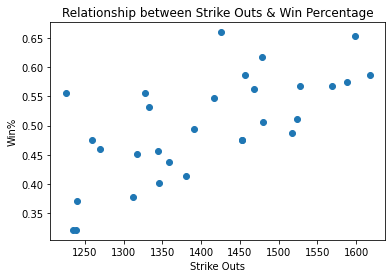

In [ ]:
plt.scatter(x, y)
plt.xlabel("Strike Outs")
plt.ylabel("Win%")
plt.title('Relationship between Strike Outs & Win Percentage')
plt.show()

In [ ]:
season_fielding = pb.team_fielding(2021)
season_fielding

,teamIDfg,Season,Team,G,GS,Inn,PO,A,E,FE,TE,DP,DPS,DPT,DPF,Scp,SB,CS,PB,WP,FP,TZ,rSB,rGDP,rARM,rGFP,rPM,DRS,BIZ,Plays,RZR,OOZ,TZL,FSR,ARM,DPR,RngR,ErrR,UZR,UZR/150,CPP,RPP,Def,0%,# 0%,1-10%,# 1-10%,10-40%,# 10-40%,40-60%,# 40-60%,60-90%,# 60-90%,90-100%,# 90-100%,rSZ,rCERA,rTS,FRM,OAA,RAA
0,13,2021,Rangers,2063,1458,12819.0,4273,1462,83,39,43,330,149,97,148,2,74,17,7,67,0.986,NaN,2,-4,14,11,39,86,2015,1618,0.803,692,NaN,NaN,13.3,-1.5,16.7,4.9,33.4,6.1,NaN,NaN,71.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,0,17,16.7,28,25
1,28,2021,Cardinals,2178,1458,12753.0,4251,1514,84,40,41,314,142,102,142,3,43,23,7,66,0.986,NaN,3,-7,8,4,60,81,1954,1657,0.848,613,NaN,NaN,3.2,-6.6,21.6,12.8,31.0,4.0,NaN,NaN,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6,3,11,-7.9,52,41
2,7,2021,Royals,2202,1458,12756.0,4252,1422,84,44,39,366,154,111,154,5,41,24,4,86,0.985,NaN,4,3,3,10,-4,23,1919,1522,0.793,645,NaN,NaN,3.6,5.7,7.0,5.8,22.1,3.4,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7,2,11,-17.3,25,20
3,21,2021,Astros,2118,1458,13005.0,4335,1432,69,27,40,301,127,96,126,2,56,26,11,72,0.988,NaN,1,-2,1,5,57,76,1837,1498,0.815,687,NaN,NaN,0.5,-1.3,18.2,2.7,20.1,2.8,NaN,NaN,35.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5,-4,16,0.8,39,32
4,12,2021,Rays,2255,1458,13101.0,4367,1358,80,34,43,310,132,95,131,6,69,22,14,64,0.986,NaN,2,4,0,-5,45,72,1882,1535,0.816,630,NaN,NaN,0.4,2.0,17.7,-5.6,14.4,2.4,NaN,NaN,33.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,2,18,5.1,31,28
5,25,2021,Mets,2240,1458,12414.0,4138,1312,95,41,52,290,121,79,121,5,66,33,12,53,0.983,NaN,6,1,0,2,-1,48,1662,1319,0.794,633,NaN,NaN,3.2,0.1,-5.9,-9.9,-12.6,-1.6,NaN,NaN,28.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,-2,32,2.2,22,16
6,20,2021,Marlins,2254,1458,12735.0,4245,1444,122,70,50,350,146,113,146,1,61,23,28,58,0.979,NaN,2,7,16,-13,25,55,1825,1478,0.810,633,NaN,NaN,15.0,4.2,-2.8,-15.6,0.7,3.4,NaN,NaN,22.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1,13,1.7,-7,-4
7,5,2021,Cleveland,2142,1458,12672.0,4224,1399,86,52,33,352,138,111,138,5,63,23,11,52,0.985,NaN,0,0,-3,-8,8,2,1875,1551,0.827,565,NaN,NaN,-3.1,4.9,-1.1,12.6,13.4,1.2,NaN,NaN,17.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,3,2.2,18,14
8,30,2021,Giants,2478,1458,13095.0,4365,1471,80,48,32,302,122,92,122,2,53,20,6,44,0.986,NaN,-2,-3,-3,3,1,32,1916,1541,0.804,662,NaN,NaN,-0.8,-4.6,4.8,1.4,0.8,-0.5,NaN,NaN,16.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,-5,34,5.5,27,21
9,19,2021,Rockies,2192,1449,12573.0,4191,1516,73,38,35,365,140,119,141,5,65,27,14,67,0.987,NaN,4,-1,5,3,45,61,1955,1601,0.819,586,NaN,NaN,8.0,-0.4,14.0,21.4,43.0,6.2,NaN,NaN,14.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0,5,0.7,3,2


In [ ]:
sf_array = np.array(season_fielding)
sf_array

array([[13, 2021, 'Rangers', ..., 16.7, 28, 25],
       [28, 2021, 'Cardinals', ..., -7.9, 52, 41],
       [7, 2021, 'Royals', ..., -17.3, 25, 20],
       ...,
       [9, 2021, 'Yankees', ..., 3.0, -22, -19],
       [1, 2021, 'Angels', ..., 3.9, -25, -21],
       [18, 2021, 'Reds', ..., 1.4, -40, -33]], dtype=object)

In [ ]:
sf_df = pd.DataFrame(sf_array)
sf_df = sf_df.sort_values(0)
sf_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
28,1,2021,Angels,2221,1458,12795.0,4265,1419,88,42,45,337,131,102,131,2,85,18,18,56,0.985,NaN,-4,-3,-15,-1,-39,-29,1909,1514,0.793,619,NaN,NaN,-10.3,-2.5,-10.3,-3.1,-26.2,-5.3,NaN,NaN,-39.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,-1,35,3.9,-25,-21
23,2,2021,Orioles,2236,1458,12618.0,4206,1359,74,36,37,248,101,74,101,2,53,27,13,88,0.987,NaN,1,-11,-1,-9,-25,-30,1968,1604,0.815,603,NaN,NaN,0.1,-4.4,-11.0,11.5,-3.9,-0.7,NaN,NaN,-23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-19,6,17,-21.3,-30,-23
22,3,2021,Red Sox,2215,1458,12771.0,4257,1421,108,58,49,342,144,113,143,3,92,22,13,63,0.981,NaN,-3,3,18,4,-45,4,1762,1359,0.771,626,NaN,NaN,13.7,1.1,-10.8,-9.1,-5.1,1.4,NaN,NaN,-21.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1,24,0.4,-39,-30
21,4,2021,White Sox,2158,1458,12630.0,4210,1211,97,50,47,284,112,87,112,7,119,24,18,84,0.982,NaN,-4,4,3,-15,-16,-40,1738,1415,0.814,507,NaN,NaN,-0.3,4.0,-5.7,11.3,9.3,1.5,NaN,NaN,-17.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7,-2,12,-13.4,-8,-7
7,5,2021,Cleveland,2142,1458,12672.0,4224,1399,86,52,33,352,138,111,138,5,63,23,11,52,0.985,NaN,0,0,-3,-8,8,2,1875,1551,0.827,565,NaN,NaN,-3.1,4.9,-1.1,12.6,13.4,1.2,NaN,NaN,17.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,3,2.2,18,14
25,6,2021,Tigers,2191,1458,12777.0,4259,1492,83,49,34,339,137,109,136,4,67,32,18,80,0.986,NaN,4,-7,-6,-10,-57,-35,1997,1589,0.796,683,NaN,NaN,-11.4,-6.7,-13.9,-3.8,-35.8,-7.3,NaN,NaN,-26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-13,0,47,-13.0,-17,-14
2,7,2021,Royals,2202,1458,12756.0,4252,1422,84,44,39,366,154,111,154,5,41,24,4,86,0.985,NaN,4,3,3,10,-4,23,1919,1522,0.793,645,NaN,NaN,3.6,5.7,7.0,5.8,22.1,3.4,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7,2,11,-17.3,25,20
13,8,2021,Twins,2233,1458,12774.0,4258,1421,107,56,51,320,140,99,140,7,80,26,13,48,0.982,NaN,-4,3,2,10,-1,32,1931,1569,0.813,641,NaN,NaN,-1.6,0.2,4.9,-25.1,-21.7,-4.3,NaN,NaN,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,-1,16,5.9,6,6
27,9,2021,Yankees,2230,1458,12918.0,4306,1318,98,50,45,282,115,92,115,4,86,17,14,85,0.983,NaN,-2,2,4,-6,-46,-41,1807,1487,0.823,539,NaN,NaN,-4.5,-0.3,-0.8,1.7,-3.8,-1.4,NaN,NaN,-32.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,-3,17,3.0,-22,-19
10,10,2021,Athletics,2166,1458,12897.0,4299,1320,72,35,36,285,118,85,118,3,65,22,6,63,0.987,NaN,3,-2,-10,-5,-10,-10,1917,1548,0.808,637,NaN,NaN,-5.5,-2.7,-3.9,14.1,2.0,-1.0,NaN,NaN,10.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,2,5,9.0,22,17


In [ ]:
teams_new = {
    'Diamondbacks': 'ARI',
    'Braves': 'ATL',
    'Orioles': 'BAL',
    'Red Sox': 'BOS',
    'Cubs': 'CHC',
    'White Sox': 'CHW',
    'Reds': 'CIN',
    'Cleveland': 'CLE',
    'Rockies': 'COL',
    'Tigers': 'DET',
    'Astros': 'HOU',
    'Royals': 'KCR',
    'Angels': 'LAA',
    'Dodgers': 'LAD',
    'Marlins': 'MIA',
    'Brewers': 'MIL',
    'Twins': 'MIN',
    'Mets': 'NYM',
    'Yankees': 'NYY',
    'Athletics': 'OAK',
    'Phillies': 'PHI',
    'Pirates': 'PIT',
    'Padres': 'SDP',
    'Mariners': 'SEA',
    'Giants': 'SFG',
    'Cardinals': 'STL',
    'Rays': 'TBR',
    'Rangers': 'TEX',
    'Blue Jays': 'TOR',
    'Nationals': 'WSN'
}

sf_df[2] = sf_df[2].replace(teams_new)
sf_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
28,1,2021,LAA,2221,1458,12795.0,4265,1419,88,42,45,337,131,102,131,2,85,18,18,56,0.985,NaN,-4,-3,-15,-1,-39,-29,1909,1514,0.793,619,NaN,NaN,-10.3,-2.5,-10.3,-3.1,-26.2,-5.3,NaN,NaN,-39.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,-1,35,3.9,-25,-21
23,2,2021,BAL,2236,1458,12618.0,4206,1359,74,36,37,248,101,74,101,2,53,27,13,88,0.987,NaN,1,-11,-1,-9,-25,-30,1968,1604,0.815,603,NaN,NaN,0.1,-4.4,-11.0,11.5,-3.9,-0.7,NaN,NaN,-23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-19,6,17,-21.3,-30,-23
22,3,2021,BOS,2215,1458,12771.0,4257,1421,108,58,49,342,144,113,143,3,92,22,13,63,0.981,NaN,-3,3,18,4,-45,4,1762,1359,0.771,626,NaN,NaN,13.7,1.1,-10.8,-9.1,-5.1,1.4,NaN,NaN,-21.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1,24,0.4,-39,-30
21,4,2021,CHW,2158,1458,12630.0,4210,1211,97,50,47,284,112,87,112,7,119,24,18,84,0.982,NaN,-4,4,3,-15,-16,-40,1738,1415,0.814,507,NaN,NaN,-0.3,4.0,-5.7,11.3,9.3,1.5,NaN,NaN,-17.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7,-2,12,-13.4,-8,-7
7,5,2021,CLE,2142,1458,12672.0,4224,1399,86,52,33,352,138,111,138,5,63,23,11,52,0.985,NaN,0,0,-3,-8,8,2,1875,1551,0.827,565,NaN,NaN,-3.1,4.9,-1.1,12.6,13.4,1.2,NaN,NaN,17.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,3,2.2,18,14
25,6,2021,DET,2191,1458,12777.0,4259,1492,83,49,34,339,137,109,136,4,67,32,18,80,0.986,NaN,4,-7,-6,-10,-57,-35,1997,1589,0.796,683,NaN,NaN,-11.4,-6.7,-13.9,-3.8,-35.8,-7.3,NaN,NaN,-26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-13,0,47,-13.0,-17,-14
2,7,2021,KCR,2202,1458,12756.0,4252,1422,84,44,39,366,154,111,154,5,41,24,4,86,0.985,NaN,4,3,3,10,-4,23,1919,1522,0.793,645,NaN,NaN,3.6,5.7,7.0,5.8,22.1,3.4,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7,2,11,-17.3,25,20
13,8,2021,MIN,2233,1458,12774.0,4258,1421,107,56,51,320,140,99,140,7,80,26,13,48,0.982,NaN,-4,3,2,10,-1,32,1931,1569,0.813,641,NaN,NaN,-1.6,0.2,4.9,-25.1,-21.7,-4.3,NaN,NaN,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,-1,16,5.9,6,6
27,9,2021,NYY,2230,1458,12918.0,4306,1318,98,50,45,282,115,92,115,4,86,17,14,85,0.983,NaN,-2,2,4,-6,-46,-41,1807,1487,0.823,539,NaN,NaN,-4.5,-0.3,-0.8,1.7,-3.8,-1.4,NaN,NaN,-32.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,-3,17,3.0,-22,-19
10,10,2021,OAK,2166,1458,12897.0,4299,1320,72,35,36,285,118,85,118,3,65,22,6,63,0.987,NaN,3,-2,-10,-5,-10,-10,1917,1548,0.808,637,NaN,NaN,-5.5,-2.7,-3.9,14.1,2.0,-1.0,NaN,NaN,10.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,2,5,9.0,22,17


In [ ]:
sf_df_sorted = sf_df.sort_values(2)
sf_df_sorted

In [ ]:
merged_df = pd.merge(sr_df_sorted[[3]], sf_df_sorted[[6]], on=sr_df_sorted[0])
merged_df

,key_0,3,6
0,ARI,.321,4252
1,ATL,.547,4232
2,BAL,.321,4206
3,BOS,.568,4257
4,CHC,.438,4238
5,CHW,.574,4210
6,CIN,.512,4303
7,CLE,.494,4224
8,COL,.460,4191
9,DET,.475,4259


In [ ]:
x = merged_df[6].astype(float)
x

0     4252.0
1     4232.0
2     4206.0
3     4257.0
4     4238.0
5     4210.0
6     4303.0
7     4224.0
8     4191.0
9     4259.0
10    4335.0
11    4252.0
12    4265.0
13    4356.0
14    4245.0
15    4308.0
16    4258.0
17    4138.0
18    4306.0
19    4299.0
20    4256.0
21    4189.0
22    4290.0
23    4321.0
24    4365.0
25    4251.0
26    4367.0
27    4273.0
28    4216.0
29    4183.0
Name: 6, dtype: float64

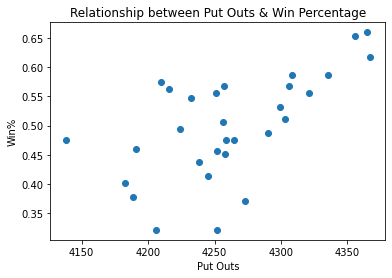

In [ ]:
plt.scatter(x, y)
plt.xlabel("Put Outs")
plt.ylabel("Win%")
plt.title('Relationship between Put Outs & Win Percentage')
plt.show()

In [ ]:
correlation = x.corr(y)
correlation

0.6136177632858877

In [ ]:
# load season record
season_record_trial = pb.standings(2020)
season_record_trial

[                  Tm   W   L  W-L%    GB
 1     Tampa Bay Rays  40  20  .667    --
 2   New York Yankees  33  27  .550   7.0
 3  Toronto Blue Jays  32  28  .533   8.0
 4  Baltimore Orioles  25  35  .417  15.0
 5     Boston Red Sox  24  36  .400  16.0,
                    Tm   W   L  W-L%    GB
 1     Minnesota Twins  36  24  .600    --
 2   Cleveland Indians  35  25  .583   1.0
 3   Chicago White Sox  35  25  .583   1.0
 4  Kansas City Royals  26  34  .433  10.0
 5      Detroit Tigers  23  35  .397  12.0,
                    Tm   W   L  W-L%    GB
 1   Oakland Athletics  36  24  .600    --
 2      Houston Astros  29  31  .483   7.0
 3    Seattle Mariners  27  33  .450   9.0
 4  Los Angeles Angels  26  34  .433  10.0
 5       Texas Rangers  22  38  .367  14.0,
                       Tm   W   L  W-L%   GB
 1         Atlanta Braves  35  25  .583   --
 2          Miami Marlins  31  29  .517  4.0
 3  Philadelphia Phillies  28  32  .467  7.0
 4          New York Mets  26  34  .433  9.0
 5  

In [ ]:
# load fielding stats 
season_fielding = pb.team_fielding(2015)
# chosen pitching stats
fielding_columns = ['Season', 'Team', 'E', 'DP', 'FP']
season_fielding = season_fielding[fielding_columns]
season_fielding
teams_new = {
    'Diamondbacks': 'ARI',
    'Braves': 'ATL',
    'Orioles': 'BAL',
    'Red Sox': 'BOS',
    'Cubs': 'CHC',
    'White Sox': 'CHW',
    'Reds': 'CIN',
    'Indians': 'CLE',
    'Rockies': 'COL',
    'Tigers': 'DET',
    'Astros': 'HOU',
    'Royals': 'KCR',
    'Angels': 'LAA',
    'Dodgers': 'LAD',
    'Marlins': 'MIA',
    'Brewers': 'MIL',
    'Twins': 'MIN',
    'Mets': 'NYM',
    'Yankees': 'NYY',
    'Athletics': 'OAK',
    'Phillies': 'PHI',
    'Pirates': 'PIT',
    'Padres': 'SDP',
    'Mariners': 'SEA',
    'Giants': 'SFG',
    'Cardinals': 'STL',
    'Rays': 'TBR',
    'Rangers': 'TEX',
    'Blue Jays': 'TOR',
    'Nationals': 'WSN'
}

season_fielding["Team"] = season_fielding["Team"].replace(teams_new)
season_fielding = season_fielding.sort_values("Team")
season_fielding

In [ ]:
# load team batting stats for 2021
pd.set_option('display.max_columns', None)
season_batting = pb.team_batting(2014)
season_batting = season_batting.sort_values("Team")

# chosen batting stats
batting_columns = ['Season', 'Team', 'R', 'AB', 'H', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF']
season_batting = season_batting[batting_columns]
season_batting

In [ ]:
# load pitching stats 
season_pitching = pb.team_pitching(2017)
season_pitching = season_pitching.sort_values("Team")
# chosen pitching stats
pitching_columns = ['Season', 'Team', 'ER', 'ERA', 'CG', 'ShO', 'SV', 'H', 'HR', 'BB', 'SO']
season_pitching = season_pitching[pitching_columns]
season_pitching

In [ ]:
# load season record
season_record = pb.standings(2018)

# convert list to array
sr_array = np.array(season_record)

# re-shape to be used as a 2-D input for pd
sr = sr_array.reshape(30, -1)
# convert array to dataframe
sr_df = pd.DataFrame(sr)
sr_df

sr_df = sr_df.drop(1, axis = 1)
sr_df = sr_df.drop(2, axis = 1)
sr_df = sr_df.drop(4, axis = 1)
sr_df = sr_df.rename(columns={0:"Team", 3:"Win %"})
sr_df

# create a dictionary of team names and abbreviations
teams = {
    'Arizona Diamondbacks': 'ARI',
    'Atlanta Braves': 'ATL',
    'Baltimore Orioles': 'BAL',
    'Boston Red Sox': 'BOS',
    'Chicago Cubs': 'CHC',
    'Chicago White Sox': 'CHW',
    'Cincinnati Reds': 'CIN',
    'Cleveland Indians': 'CLE',
    'Colorado Rockies': 'COL',
    'Detroit Tigers': 'DET',
    'Houston Astros': 'HOU',
    'Kansas City Royals': 'KCR',
    'Los Angeles Angels': 'LAA',
    "Los Angeles Angels of Anaheim": "LAA",
    'Los Angeles Dodgers': 'LAD',
    'Miami Marlins': 'MIA',
    'Milwaukee Brewers': 'MIL',
    'Minnesota Twins': 'MIN',
    'New York Mets': 'NYM',
    'New York Yankees': 'NYY',
    'Oakland Athletics': 'OAK',
    'Philadelphia Phillies': 'PHI',
    'Pittsburgh Pirates': 'PIT',
    'San Diego Padres': 'SDP',
    'Seattle Mariners': 'SEA',
    'San Francisco Giants': 'SFG',
    'St. Louis Cardinals': 'STL',
    'Tampa Bay Rays': 'TBR',
    'Texas Rangers': 'TEX',
    'Toronto Blue Jays': 'TOR',
    'Washington Nationals': 'WSN'
}

# replace team names with abbreviations to match rest of dataset
sr_df["Team"] = sr_df["Team"].replace(teams)

sr_df

# sort by team abbrv
sr_df_sorted = sr_df.sort_values("Team")
sr_df_sorted["Season"] = 2013
sr_df_sorted